# 2.Earth’s energy budget

In [80]:
import numpy as np
import math
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# 读取文件
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc")

# 检查文件

ds

<xarray.Dataset>
Dimensions:                      (lat: 180, lon: 360, time: 203)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

# 2.1

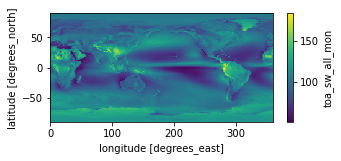

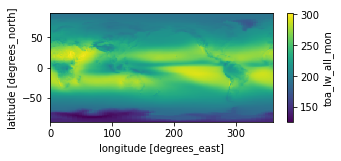

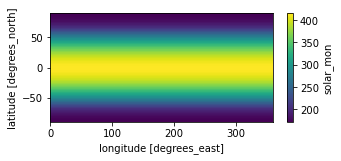

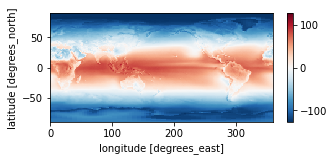

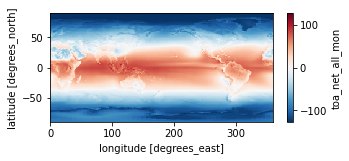

In [70]:
#计算时间平均TOA短波，并画图
ds.toa_sw_all_mon.mean(dim="time").plot(figsize=(5,2))
plt.show()
#计算时间平均TOA长波，并画图
ds.toa_lw_all_mon.mean(dim="time").plot(figsize=(5,2))
plt.show()
#计算时间平均TOA太阳辐射，并画图
ds.solar_mon.mean(dim="time").plot(figsize=(5,2))
plt.show()
#计算时间平均TOA净通量，并画图
ds1=ds.solar_mon.mean(dim="time")-ds.toa_lw_all_mon.mean(dim="time")-ds.toa_sw_all_mon.mean(dim="time")
ds1.plot(figsize=(5,2))
plt.show()
#验证时间平均TOA净通量，并画图
ds.toa_net_all_mon.mean(dim="time").plot(figsize=(5,2))
plt.show()

# 2.2

In [73]:


#利用weight函数转换经纬度为栅格
weights = np.cos(np.deg2rad(ds.lat))


#计算栅格尺度上的平均Toa短波
sw_weighted = ds.toa_sw_all_mon.weighted(weights).mean()
print(sw_weighted)
#计算栅格尺度上的平均Toa长波
lw_weighted = ds.toa_lw_all_mon.weighted(weights).mean()
print(lw_weighted)
#计算栅格尺度上的平均Toa太阳辐射
solar_weighted = ds.solar_mon.weighted(weights).mean()
print(solar_weighted)

<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.13805277)
<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.26693375)
<xarray.DataArray 'solar_mon' ()>
array(340.28326598)


# 2.3

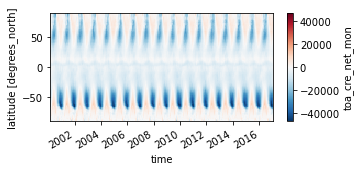

In [74]:

#计算各位置总净辐射量
ra_sum=ds.toa_cre_net_mon.sum(dim='lon')
#画图
ra_sum.transpose().plot(figsize=(5,2))

# 2.4

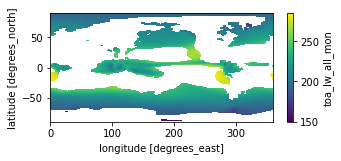

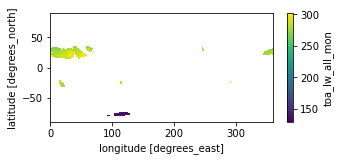

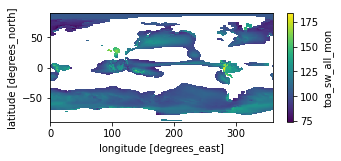

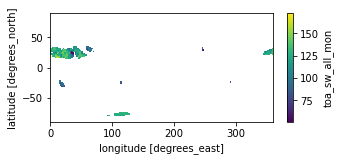

In [78]:
#根据云层面积将其分为高空云和低空云
hig_cld=(ds.cldarea_total_daynight_mon.mean(dim="time")>=75)
low_cld=(ds.cldarea_total_daynight_mon.mean(dim="time")<=25)

#绘制高空云区域时间平均TOA长波2D图
ds.toa_lw_all_mon.mean(dim="time").where(hig_cld).plot(figsize=(5,2))
plt.show()

#绘制低空云区域时间平均TOA长波2D图
ds.toa_lw_all_mon.mean(dim="time").where(low_cld).plot(figsize=(5,2))
plt.show()

#绘制高空云区域时间平均TOA短波2D图
ds.toa_sw_all_mon.mean(dim="time").where(hig_cld).plot(figsize=(5,2))
plt.show()

#绘制低空云区域时间平均TOA短波2D图
ds.toa_sw_all_mon.mean(dim="time").where(low_cld).plot(figsize=(5,2))
plt.show()

# 2.5

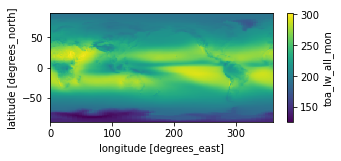

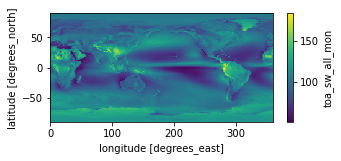

In [79]:

#计算云面积的平均值
cld_a = ds.cldarea_total_daynight_mon.mean(dim='time')

#计算短波和长波辐射的全球平均值 ，并画图 
ds.toa_lw_all_mon.mean(dim='time').where(cld_a).plot(figsize=(5,2))
plt.show()

ds.toa_sw_all_mon.mean(dim='time').where(cld_a).plot(figsize=(5,2))
plt.show()